# <b>ADASYN for image generation/balancing dataset</b>

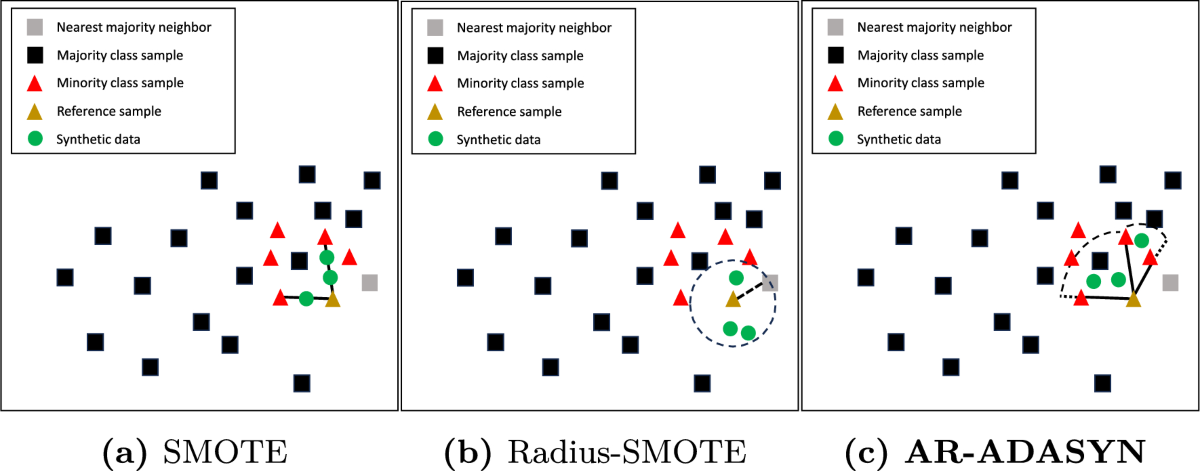

In [5]:
import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder

class ImageADASYN:
    def __init__(self) -> None:
        self.label_encoder = LabelEncoder()
    
    """
    Fitting/loading the images and preprocessing to flatten vectors for ADASYN.
    """
    def fit(self, path_to_input_image_folder:str, width_of_image:int, height_of_image:int, debug:bool=False):
        self.images:list = []
        self.labels:list = []
        self.width_of_image = width_of_image
        self.height_of_image = height_of_image
        for directory_name in os.listdir(path_to_input_image_folder):
            path = f"{path_to_input_image_folder}/{directory_name}"
            if os.path.isdir(path):
                print(directory_name)
                for file_name in os.listdir(path):
                    image = Image.open(f"{path}/{file_name}")
                    image = image.resize((self.width_of_image, self.height_of_image))
                    image_array = np.array(image).flatten()
                    self.images.append(image_array)
                    self.labels.append(file_name.split('_')[0])  
        self.images = np.array(self.images)
        self.labels = np.array(self.labels)
        if debug:
            print(f"images[0] = {self.images[0]}\n")
            print(f"labels[0] = {self.labels[0]}\n")
            print(f"X/images: \n{self.images}\n")
            print(f"y/labels: \n{self.labels}\n")

    """
    Balancing the dataset.
    """
    def balance(self, path_to_output_image_folder:str, number_of_neighbors = 5, debug=False):
        labels_encoded = self.label_encoder.fit_transform(self.labels)
        adasyn = ADASYN(sampling_strategy="minority", random_state=42, n_neighbors=number_of_neighbors)
        images_resampled, labels_resampled = adasyn.fit_resample(self.images, labels_encoded)
        if debug:
            print(f"Images resampled: \n{images_resampled}\n")
            print(f"Labels resampled: \n{labels_resampled}\n")
        shutil.rmtree(path_to_output_image_folder)
        if not os.path.exists(path_to_output_image_folder):
            os.makedirs(path_to_output_image_folder)
        directories = []
        numbers = {}
        for i in range(len(images_resampled)):
            image_array = images_resampled[i].reshape(self.width_of_image, self.height_of_image, 3)  
            image = Image.fromarray(np.uint8(image_array))
            label = self.label_encoder.inverse_transform([labels_resampled[i]])[0]
            if not directories.count(label):
                os.mkdir(f"{path_to_output_image_folder}/{label}")
                directories.append(label)
                numbers[f"{label}"]=0
                id = 0
            else:
                numbers[f"{label}"]=numbers[f"{label}"]+1
                id = numbers[f"{label}"]
            file_name = f"{label}_{id}.png"
            image.save(f"{path_to_output_image_folder}/{label}/{file_name}")

#### CONFIGURATION #############
path_to_input_image_folder = "./dataset/training/imbalanced_flags"
path_to_output_image_folder = "./dataset/training/balanced_flags"
width_of_image = 150
height_of_image = 150
number_of_neighbors = 10
#########################
    
image_adasyn = ImageADASYN()
image_adasyn.fit(path_to_input_image_folder=path_to_input_image_folder, width_of_image=width_of_image, height_of_image=height_of_image, debug=True)
image_adasyn.balance(path_to_output_image_folder=path_to_output_image_folder, number_of_neighbors=number_of_neighbors, debug=True)

China
Germany
India
Japan
UK
USA
images[0] = [185 203 216 ... 148 168 192]

labels[0] = china

X/images: 
[[185 203 216 ... 148 168 192]
 [231  47  47 ... 116  13   8]
 [231  47  47 ... 116  13   8]
 ...
 [212 227 234 ...  87 109 184]
 [212 227 234 ...  87 109 184]
 [212 227 234 ...  87 109 184]]

y/labels: 
['china' 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china'
 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china'
 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china'
 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china'
 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china'
 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china'
 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china'
 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'china'
 'china' 'china' 'china' 'china' 'china' 'china' 'china' 'germany'
 'germany' 'germany' 'germany' 'germany